### CNN Task

##### 강아지, 머핀 이진 분류
https://drive.google.com/file/d/1Q_KC2nTmGlX2PeINWwV63_kpTjnoVpiO/view?usp=sharing

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

IMAGE_SIZE = 150
BATCH_SIZE = 64

image_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

root = './datasets/muffin/original/'
original_generator = image_data_generator.flow_from_directory(root, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True)
print(original_generator.class_indices)
print(original_generator.classes)

root = './datasets/muffin/test/'
test_generator = image_data_generator.flow_from_directory(root, target_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False)
print(test_generator.class_indices)
print(test_generator.classes)

Found 4733 images belonging to 2 classes.
{'chihuahua': 0, 'muffin': 1}
[0 0 0 ... 1 1 1]
Found 1184 images belonging to 2 classes.
{'chihuahua': 0, 'muffin': 1}
[0 0 0 ... 1 1 1]


In [3]:
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'chihuahua', 1: 'muffin'}

In [4]:
original_target_names = []
test_target_names = []

for target in original_generator.classes:
    original_target_names.append(target_name[target])

for target in test_generator.classes:
    test_target_names.append(target_name[target])
    
print(original_target_names.__len__(), test_target_names.__len__())

4733 1184


In [5]:
import pandas as pd

original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_generator.filepaths, 'target_names': test_target_names, 'targets': test_generator.classes})
test_df.file_paths = test_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)
display(test_df)

,file_paths,target_names,targets
0,./datasets/muffin/original/chihuahua/img_0_0.jpg,chihuahua,0
1,./datasets/muffin/original/chihuahua/img_0_1.jpg,chihuahua,0
2,./datasets/muffin/original/chihuahua/img_0_10.jpg,chihuahua,0
3,./datasets/muffin/original/chihuahua/img_0_100...,chihuahua,0
4,./datasets/muffin/original/chihuahua/img_0_100...,chihuahua,0
...,...,...,...
4728,./datasets/muffin/original/muffin/img_4_984.jpg,muffin,1
4729,./datasets/muffin/original/muffin/img_4_990.jpg,muffin,1
4730,./datasets/muffin/original/muffin/img_4_995.jpg,muffin,1
4731,./datasets/muffin/original/muffin/img_4_998.jpg,muffin,1


,file_paths,target_names,targets
0,./datasets/muffin/test/chihuahua/img_0_1071.jpg,chihuahua,0
1,./datasets/muffin/test/chihuahua/img_0_1074.jpg,chihuahua,0
2,./datasets/muffin/test/chihuahua/img_0_1082.jpg,chihuahua,0
3,./datasets/muffin/test/chihuahua/img_0_1087.jpg,chihuahua,0
4,./datasets/muffin/test/chihuahua/img_0_11.jpg,chihuahua,0
...,...,...,...
1179,./datasets/muffin/test/muffin/img_4_979.jpg,muffin,1
1180,./datasets/muffin/test/muffin/img_4_989.jpg,muffin,1
1181,./datasets/muffin/test/muffin/img_4_991.jpg,muffin,1
1182,./datasets/muffin/test/muffin/img_4_996.jpg,muffin,1


In [6]:
from sklearn.model_selection import train_test_split

train_images, validation_images, train_targets, validation_targets = train_test_split(original_df.file_paths, original_df.targets, stratify=original_df.targets, test_size=0.2, random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())

targets
0    2047
1    1739
Name: count, dtype: int64
targets
0    512
1    435
Name: count, dtype: int64


In [7]:
import shutil
import os.path

root = './datasets/muffin/'


for filepath in train_images:
    face_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/')] + '/'
    destination = root + 'train/' + face_dir
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    shutil.copy2(filepath, destination)

In [8]:
import shutil
import os.path

root = './datasets/muffin/'


for filepath in validation_images:
    face_dir = filepath[filepath.find('original/') + 9:filepath.rindex('/')] + '/'
    destination = root + 'validation/' + face_dir
    
    if not os.path.exists(destination):
        os.mkdir(destination)
    shutil.copy2(filepath, destination)

In [9]:
train_df = original_df.loc[train_images.index].reset_index(drop=True)
validation_df = original_df.loc[validation_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

3786
947
1184


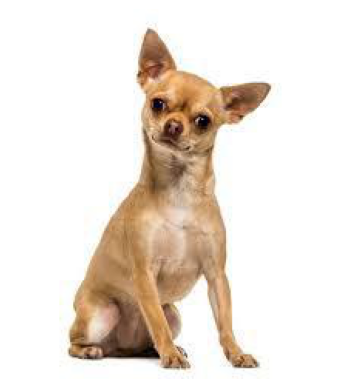

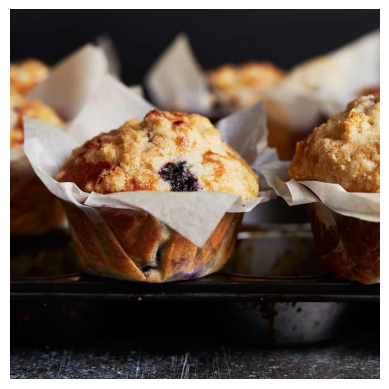

In [10]:
import cv2
import matplotlib.pyplot as plt

# 임의의 이미지 한개 선택. 
image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[500]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[100]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

In [11]:
from tensorflow.keras.applications.xception import preprocess_input

IMAGE_SIZE = 224
BATCH_SIZE = 64

train_generator = ImageDataGenerator(horizontal_flip=True, preprocessing_function=preprocess_input)

# validation data와 test data는 augmentation을 적용할 필요 없다.
validation_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_generator.flow_from_dataframe(
    dataframe=train_df, 
    x_col='file_paths', 
    y_col='target_names', 
    # 원본 이미지를 최종 resize할 image size
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    # 문자열 label을 자동 Encoding. 
    class_mode='binary', 
    batch_size=BATCH_SIZE, 
    shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(
    dataframe=validation_df, 
    x_col='file_paths', 
    y_col='target_names', 
    # 원본 이미지를 최종 resize할 image size
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    # 문자열 label을 자동 Encoding. 
    class_mode='binary', 
    batch_size=BATCH_SIZE,
    shuffle=False)

test_flow = test_generator.flow_from_dataframe(
    dataframe=test_df, 
    x_col='file_paths', 
    y_col='target_names', 
    # 원본 이미지를 최종 resize할 image size
    target_size=(IMAGE_SIZE, IMAGE_SIZE), 
    # 문자열 label을 자동 Encoding. 
    class_mode='binary', 
    batch_size=BATCH_SIZE,
    shuffle=False)

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 3786 validated image filenames belonging to 2 classes.
Found 947 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
{'chihuahua': 0, 'muffin': 1}
{'chihuahua': 0, 'muffin': 1}
{'chihuahua': 0, 'muffin': 1}


In [12]:
images_array = next(train_flow)[0]
targets_array = next(train_flow)[1]
print(images_array.shape, targets_array.shape)

print(images_array[0])
print(targets_array[0])

(64, 224, 224, 3) (64,)
[[[ 0.7647059   0.654902    0.28627455]
  [ 0.77254903  0.67058825  0.23921573]
  [ 0.8039216   0.7019608   0.28627455]
  ...
  [ 0.9137255   0.9137255   0.9137255 ]
  [ 0.8117647   0.8117647   0.8117647 ]
  [ 0.6627451   0.6627451   0.6627451 ]]

 [[ 0.85882354  0.7254902   0.36470592]
  [ 0.8352941   0.7254902   0.3411765 ]
  [ 0.8509804   0.7411765   0.37254906]
  ...
  [ 0.9372549   0.9372549   0.9372549 ]
  [ 0.85882354  0.85882354  0.85882354]
  [ 0.7254902   0.7254902   0.7254902 ]]

 [[ 0.8745098   0.7411765   0.3803922 ]
  [ 0.8901961   0.75686276  0.41176474]
  [ 0.8901961   0.75686276  0.41960788]
  ...
  [ 0.9607843   0.9607843   0.9607843 ]
  [ 0.8901961   0.8901961   0.8901961 ]
  [ 0.7647059   0.7647059   0.7647059 ]]

 ...

 [[-0.35686272 -0.44313723 -0.58431375]
  [-0.40392154 -0.4352941  -0.4588235 ]
  [-0.36470586 -0.40392154 -0.42745095]
  ...
  [ 0.27058828  0.2941177   0.23921573]
  [ 0.78039217  0.7882353   0.7411765 ]
  [ 0.827451    0.80

In [13]:
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

# 배치 크기와 이미지 크기를 전역 변수로 선언 
BATCH_SIZE = 64
IMAGE_SIZE = 224


class Dataset(Sequence):
#     입력 값(file_paths, targets)은 반드시 numpy array로 전달해야 한다.
#     file_paths: 이미지 파일의 절대 경로 list
#     targets: 이미지의 타겟 데이터 list
#     batch_size: __getitem__(self, index)를 호출할 때마다 가져올 데이터 batch 건수
#     aug: 이미지 증강 객체(albumentations)
#     shuffle: epoch마다 데이터를 섞을지 여부(학습 데이터만 적용)
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, shuffle=False, preprocess=None):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.shuffle = shuffle
        self.preprocess = preprocess
        
#         학습 데이터일 때
        if self.shuffle:
#             객체 생성 시 데이터를 섞고 시작 
            self.on_epoch_end()
            
#     Sequence를 상속받은 Dataset은 batch_size 단위로 입력 데이터를 처리한다.
#     __len__()은 전체 데이터 건수에서 batch_size 단위로 몇 번 데이터를 처리하는지 리턴한다.
    def __len__(self):
#         나누어 떨어지지 않으면 나머지 데이터를 위해 1번 더 가져오고 이를 위해 소수점은 모두 올려준다(np.ceil()).
        return int(np.ceil(len(self.targets)/self.batch_size))

#     batch_size 단위로 이미지 배열 list와 타겟 데이터 list를 가져온 뒤 변환한 값을 리턴한다.    
#     몇 번째 batch인지를 index로 전달받고 해당 index의 batch_size만큼 데이터들을 변환한다.
    def __getitem__(self, index):
        # 해당 인덱스의 batch_size만큼 슬라이스 인덱싱으로 file_path와 targets를 가져온다.
        file_paths_batch = self.file_paths[index*self.batch_size:(index+1)*self.batch_size]
        # 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
        targets_batch = np.expand_dims(self.targets[index*self.batch_size:(index+1)*self.batch_size], axis=-1)
        
        # albumentations은 한 번에 이미지 한 개만 변환할 수 있기 때문에 batch_size만큼 반복하여 수행한다.
        files_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
        # opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음.
        for index in range(file_paths_batch.shape[0]):
#             opencv로 해당 경로의 이미지 불러오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[index]), cv2.COLOR_BGR2RGB)
#             원본 이미지를 모델에 맞게 Resize 진행
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
            if self.aug is not None:
                image = self.aug(image=image)['image']
            
            if self.preprocess is not None:
                image = self.preprocess(image)
                
            files_batch[index] = image
       
        return files_batch, targets_batch
            
            
    # 반복(epoch)이 끝나면 모델의 fit()에서 호출된다. 
    def on_epoch_end(self):
        if(self.shuffle):
            # 이미지 데이터와 맞는 타겟 데이터를 한 쌍으로 섞어준다.
            self.file_paths, self.targets = sklearn.utils.shuffle(self.file_paths, self.targets)
        else:
            pass

In [14]:
train_file_paths = train_df['file_paths'].values
train_targets = pd.factorize(train_df['targets'])[0]

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.factorize(validation_df['targets'])[0]

test_file_paths = test_df['file_paths'].values
test_targets = pd.factorize(test_df['targets'])[0]

In [15]:
import numpy as np
import albumentations as A

aug = A.Compose([
    A.HorizontalFlip(p=0.3),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5)
])

dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, shuffle=True)

files_batch, targets_batch = next(iter(dataset))
# 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
print(files_batch.shape, targets_batch.shape)

(64, 224, 224, 3) (64, 1)


                      file_paths
target_names targets            
chihuahua    0               640
muffin       1               544


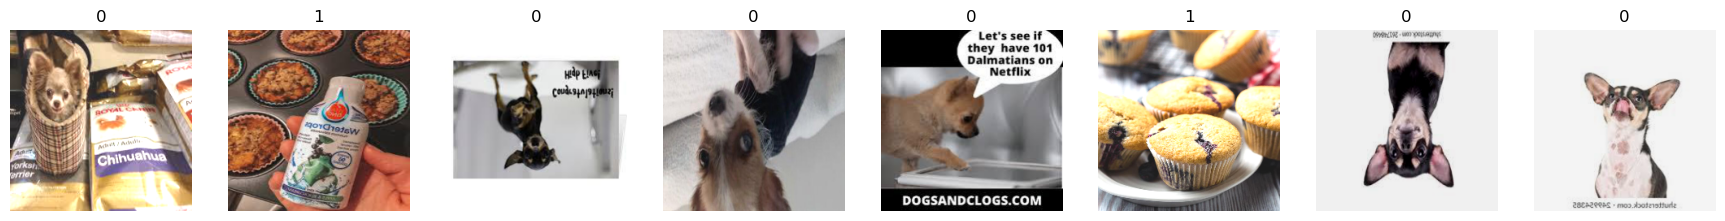

In [16]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

print(test_df.groupby(by=['target_names', 'targets']).count())
show_images(files_batch, ncols=8, title=np.squeeze(targets_batch))

In [17]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

train_dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, 
                      shuffle=True, preprocess=xception_preprocess_input)
validation_dataset = Dataset(validation_file_paths, validation_targets, batch_size=BATCH_SIZE, aug=None, 
                       shuffle=False, preprocess=xception_preprocess_input)

test_dataset = Dataset(test_file_paths, test_targets, batch_size=BATCH_SIZE, aug=None, 
                       shuffle=False, preprocess=xception_preprocess_input)

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        base_model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception':
        base_model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'mobilenet':
        base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')
        
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    output = Dense(2, activation='sigmoid', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    if verbose:
        model.summary()
        
    return model

In [20]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='resnet50', verbose=True)
model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=['acc'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 56, 56, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv3_block2_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 30, 30, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 28, 28, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block2_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 14, 14, 512)          66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 14, 14, 512)          0         ['max_pooling2d_1[0][0]',     
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv4_block1_preact_bn (Ba  (None, 14, 14, 512)          2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv4_blo

 D)                                                                 0]']                          
                                                                                                  
 conv4_block3_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block3_2_pad (ZeroPa  (None, 16, 16, 256)          0         ['conv4_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
          

 conv4_block5_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block5_out (Add)      (None, 14, 14, 1024)         0         ['conv4_block4_out[0][0]',    
                                                                     'conv4_block5_3_conv[0][0]'] 
                                                                                                  
 conv4_block6_preact_bn (Ba  (None, 14, 14, 1024)         4096      ['conv4_block5_out[0][0]']    
 tchNormal

                                                                                                  
 conv5_block2_preact_relu (  (None, 7, 7, 2048)           0         ['conv5_block2_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv5_block2_1_conv (Conv2  (None, 7, 7, 512)            1048576   ['conv5_block2_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv5_block2_1_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_blo

In [21]:
from tensorflow.keras import layers

def fine_tune(datas, model_name, augmentor, preprocess):
    # 학습/검증/테스트용 이미지 파일 절대경로와 Label encoding 된 데이터 세트 반환
    train_file_paths, train_targets, validation_file_paths, validation_targets, test_file_paths, test_targets = datas
    
    # 학습과 검증용 Sequence Dataset 생성. 
    train_dataset = Dataset(train_file_paths, train_targets, batch_size=BATCH_SIZE, aug=aug, 
                      shuffle=True, preprocess=preprocess)
    validation_dataset = Dataset(validation_file_paths, validation_targets, batch_size=BATCH_SIZE, aug=None, 
                       shuffle=False, preprocess=preprocess)
    
    # 입력된 model_name에 따라 모델 생성. 
    model = create_model(model_name=model_name, verbose=True)
    model.compile(optimizer=Adam(0.0001), loss=BinaryCrossentropy(), metrics=['acc'])
    
    # feature extractor layer들 freeze
    for layer in model.layers[:-4]:
        layer.trainable = False
    
    FIRST_EPOCHS = 10
    SECOND_EPOCHS = 10
    # 1단계 fine tuning 학습 수행. 
    history = model.fit(train_dataset, epochs=FIRST_EPOCHS, 
                       validation_data=validation_dataset,
                       verbose=1)
    # 전체 layer들을 unfreeze, 단 batch normalization layer는 그대로 freeze
    for layer in model.layers:
        # 배치 정규화는 Freeze 시킨다.
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
    # 2단계는 learning rate를 기존 보다 1/10 감소    
    model.compile(optimizer=Adam(0.0001), loss=BinaryCrossentropy(), metrics=['acc'])
    history = model.fit(train_dataset, epochs=FIRST_EPOCHS, 
                       validation_data=validation_dataset,
                       verbose=1)
    
    return model, history

In [22]:
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input

model, history = fine_tune((train_file_paths, train_targets, validation_file_paths, validation_targets, test_file_paths, test_targets),
                                                     'resnet50', None, xception_preprocess_input)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 56, 56, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16384     ['conv2_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv3_block2_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 30, 30, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_block2_2_conv (Conv2  (None, 28, 28, 128)          147456    ['conv3_block2_2_pad[0][0]']  
 D)                                                                                               
                                                                                                  
 conv3_block2_2_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block2_2_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 14, 14, 512)          66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 14, 14, 512)          0         ['max_pooling2d_4[0][0]',     
                                                                     'conv3_block4_3_conv[0][0]'] 
                                                                                                  
 conv4_block1_preact_bn (Ba  (None, 14, 14, 512)          2048      ['conv3_block4_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv4_blo

 D)                                                                 0]']                          
                                                                                                  
 conv4_block3_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block3_2_pad (ZeroPa  (None, 16, 16, 256)          0         ['conv4_block3_1_relu[0][0]'] 
 dding2D)                                                                                         
          

 conv4_block5_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block5_out (Add)      (None, 14, 14, 1024)         0         ['conv4_block4_out[0][0]',    
                                                                     'conv4_block5_3_conv[0][0]'] 
                                                                                                  
 conv4_block6_preact_bn (Ba  (None, 14, 14, 1024)         4096      ['conv4_block5_out[0][0]']    
 tchNormal

                                                                                                  
 conv5_block2_preact_relu (  (None, 7, 7, 2048)           0         ['conv5_block2_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv5_block2_1_conv (Conv2  (None, 7, 7, 512)            1048576   ['conv5_block2_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv5_block2_1_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_blo

 5/60 [=>............................] - ETA: 11:15 - loss: 0.6613 - acc: 0.3844

KeyboardInterrupt: 